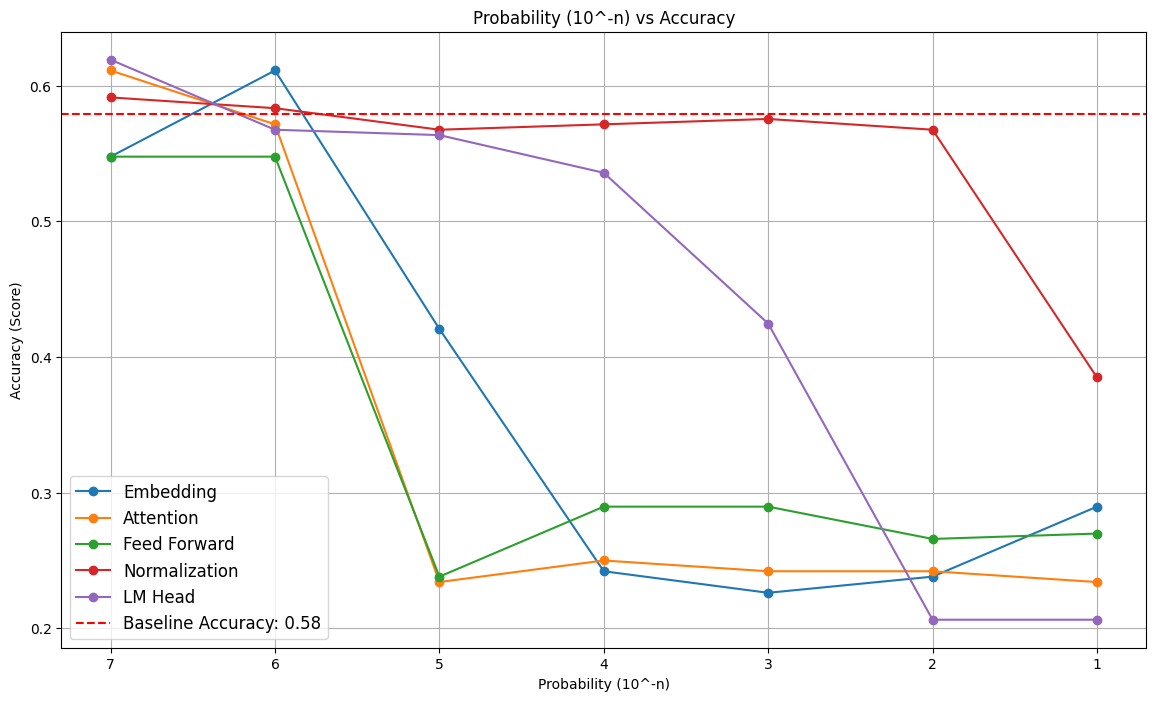

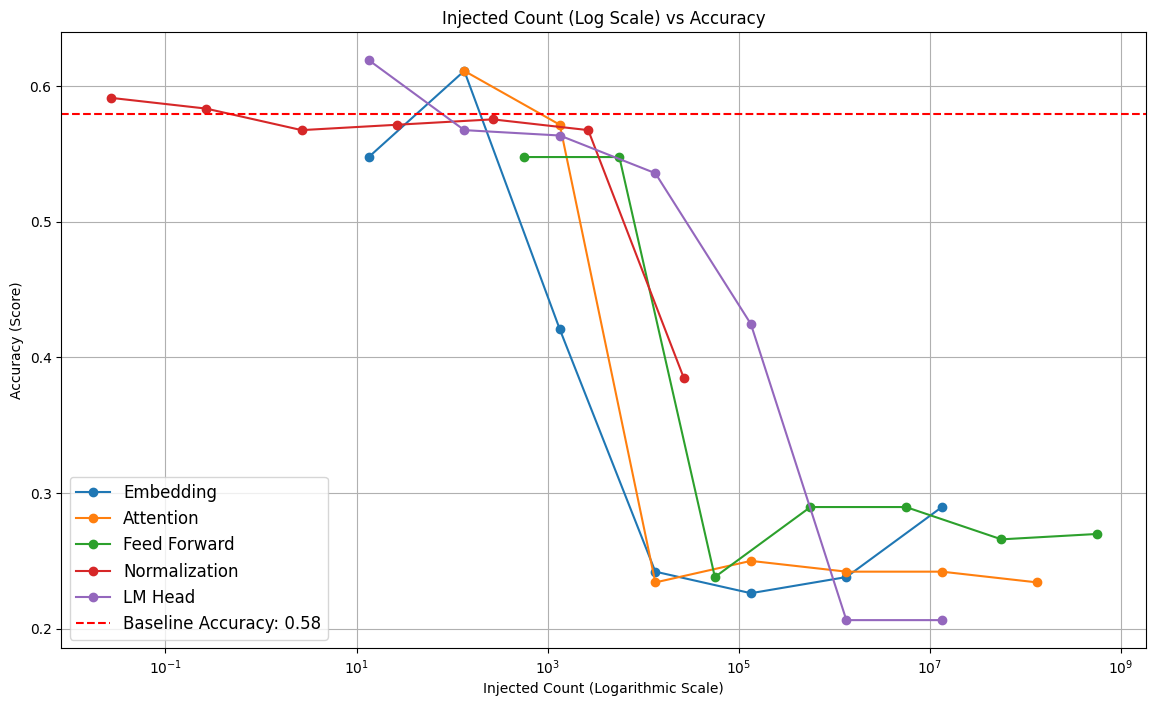

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load CSV files
embedded_df = pd.read_csv('/content/injected_embedding_results.csv')
attention_df = pd.read_csv('/content/injected_attention_results.csv')
feed_forward_df = pd.read_csv('/content/injected_feed_forward_results.csv')
normalization_df = pd.read_csv('/content/injected_normalization_results.csv')
output_df = pd.read_csv('/content/injected_output_results.csv')

baseline_accuracy = 0.5793650793650794  # Replace with actual baseline if known

# Add relative accuracy loss to each DataFrame
for df in [embedded_df, attention_df, feed_forward_df, normalization_df, output_df]:
    df['Relative Loss'] = (baseline_accuracy - df['Score']) / baseline_accuracy


# Line chart: Probability (10^-n) vs Score
plt.figure(figsize=(14, 8))  # Increase figure size
plt.plot(embedded_df["Probability (10^-n)"], embedded_df["Score"], marker='o', linestyle='-', label='Embedding')
plt.plot(attention_df["Probability (10^-n)"], attention_df["Score"], marker='o', linestyle='-', label='Attention')
plt.plot(feed_forward_df["Probability (10^-n)"], feed_forward_df["Score"], marker='o', linestyle='-', label='Feed Forward')
plt.plot(normalization_df["Probability (10^-n)"], normalization_df["Score"], marker='o', linestyle='-', label='Normalization')
plt.plot(output_df["Probability (10^-n)"], output_df["Score"], marker='o', linestyle='-', label='LM Head')
plt.axhline(y=baseline_accuracy, color='red', linestyle='--', label=f'Baseline Accuracy: {baseline_accuracy:.2f}')
plt.gca().invert_xaxis()  # Invert x-axis for descending probabilities
plt.title('Probability (10^-n) vs Accuracy')
plt.xlabel('Probability (10^-n)')
plt.ylabel('Accuracy (Score)')
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Line chart: Injected Count vs Score (logarithmic scale)
plt.figure(figsize=(14, 8))  # Increase figure size
plt.plot(embedded_df["Injected Count"], embedded_df["Score"], marker='o', linestyle='-', label='Embedding')
plt.plot(attention_df["Injected Count"], attention_df["Score"], marker='o', linestyle='-', label='Attention')
plt.plot(feed_forward_df["Injected Count"], feed_forward_df["Score"], marker='o', linestyle='-', label='Feed Forward')
plt.plot(normalization_df["Injected Count"], normalization_df["Score"], marker='o', linestyle='-', label='Normalization')
plt.plot(output_df["Injected Count"], output_df["Score"], marker='o', linestyle='-', label='LM Head')
plt.axhline(y=baseline_accuracy, color='red', linestyle='--', label=f'Baseline Accuracy: {baseline_accuracy:.2f}')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Injected Count (Log Scale) vs Accuracy')
plt.xlabel('Injected Count (Logarithmic Scale)')
plt.ylabel('Accuracy (Score)')
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


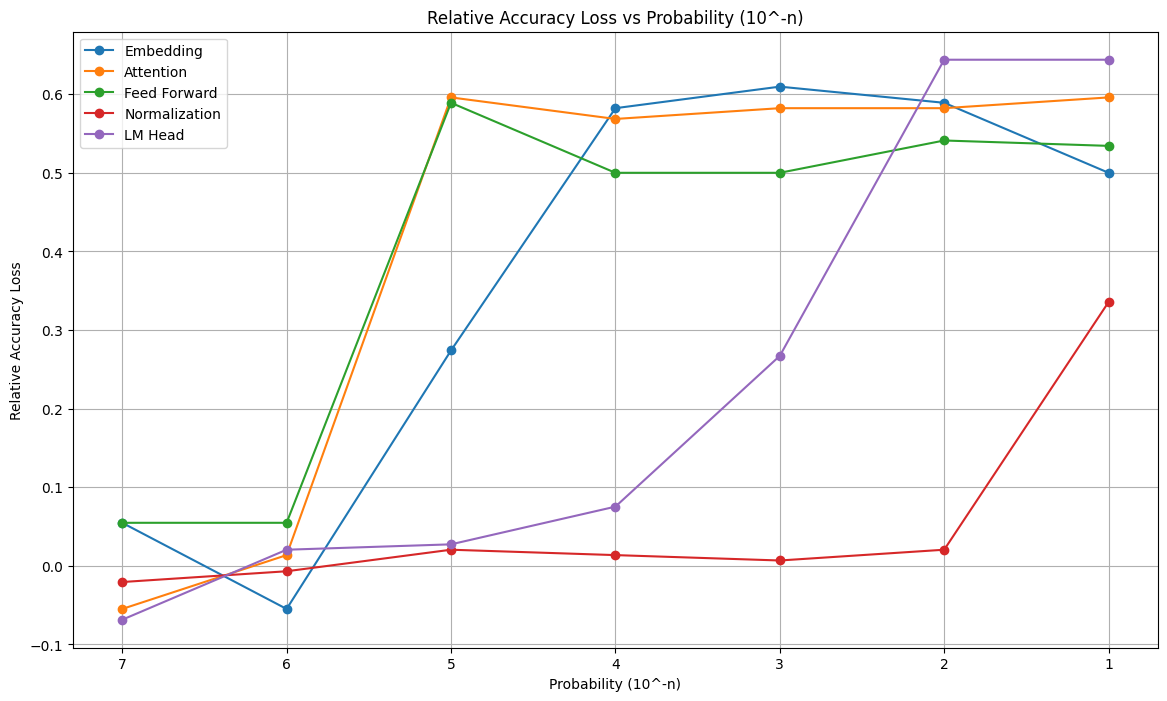

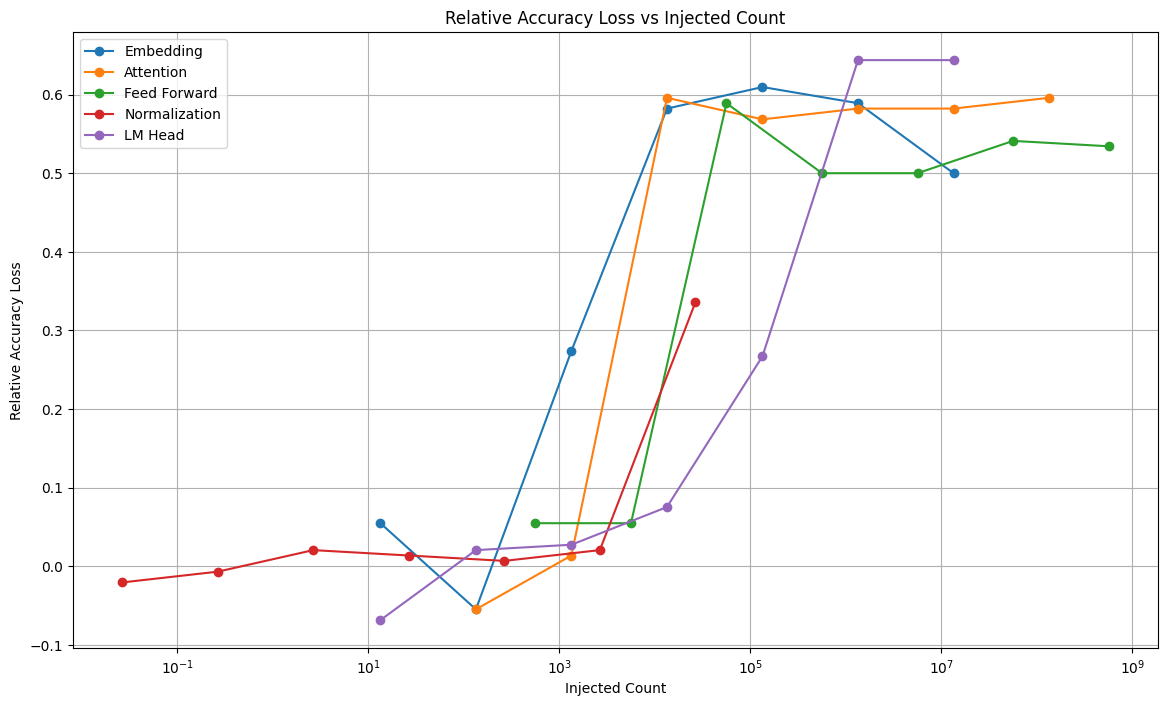

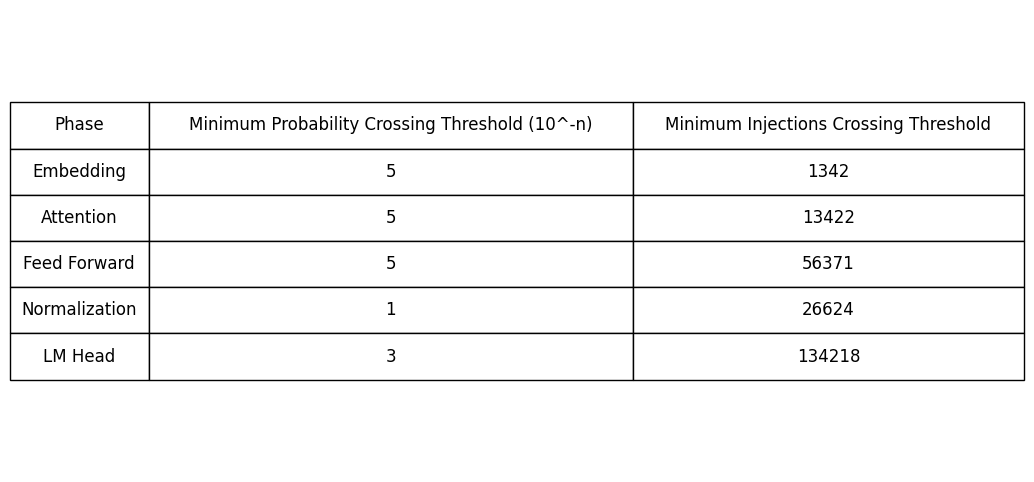

In [ ]:

# Visualize the relative accuracy loss for each phase at different probabilities
plt.figure(figsize=(14, 8))
plt.plot(embedded_df["Probability (10^-n)"], embedded_df["Relative Loss"], marker='o', linestyle='-', label='Embedding')
plt.plot(attention_df["Probability (10^-n)"], attention_df["Relative Loss"], marker='o', linestyle='-', label='Attention')
plt.plot(feed_forward_df["Probability (10^-n)"], feed_forward_df["Relative Loss"], marker='o', linestyle='-', label='Feed Forward')
plt.plot(normalization_df["Probability (10^-n)"], normalization_df["Relative Loss"], marker='o', linestyle='-', label='Normalization')
plt.plot(output_df["Probability (10^-n)"], output_df["Relative Loss"], marker='o', linestyle='-', label='LM Head')
plt.gca().invert_xaxis()  # Invert x-axis for descending probabilities
plt.title('Relative Accuracy Loss vs Probability (10^-n)')
plt.xlabel('Probability (10^-n)')
plt.ylabel('Relative Accuracy Loss')
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# Visualize the relative accuracy loss for each phase at different injected counts
plt.figure(figsize=(14, 8))
plt.plot(embedded_df["Injected Count"], embedded_df["Relative Loss"], marker='o', linestyle='-', label='Embedding')
plt.plot(attention_df["Injected Count"], attention_df["Relative Loss"], marker='o', linestyle='-', label='Attention')
plt.plot(feed_forward_df["Injected Count"], feed_forward_df["Relative Loss"], marker='o', linestyle='-', label='Feed Forward')
plt.plot(normalization_df["Injected Count"], normalization_df["Relative Loss"], marker='o', linestyle='-', label='Normalization')
plt.plot(output_df["Injected Count"], output_df["Relative Loss"], marker='o', linestyle='-', label='LM Head')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Relative Accuracy Loss vs Injected Count')
plt.xlabel('Injected Count')
plt.ylabel('Relative Accuracy Loss')
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

# Create a summary of thresholds
threshold = 0.5  # Example threshold for accuracy drop
results = []
for name, df in zip(['Embedding', 'Attention', 'Feed Forward', 'Normalization', 'LM Head'],
                    [embedded_df, attention_df, feed_forward_df, normalization_df, output_df]):
    threshold_crossed = df[df['Score'] < threshold]
    if not threshold_crossed.empty:
        min_prob = threshold_crossed["Probability (10^-n)"].max()
        min_injections = round(threshold_crossed["Injected Count"].min())
        results.append((name, min_prob, min_injections))
    else:
        results.append((name, 'No threshold crossing'))

# Display results
summary_df = pd.DataFrame(results, columns=['Phase', 'Minimum Probability Crossing Threshold (10^-n)', 'Minimum Injections Crossing Threshold'])

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(summary_df.columns))))

# Set custom row heights for better spacing
for i, cell in table.get_celld().items():
    cell.set_height(0.1)  # Adjust row height for more space
    cell.set_width(0.05)  # Adjust column width for more space (optional

# Show the plot
plt.show()